## Tensorflow introduction -- Linear Regression 

In [2]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

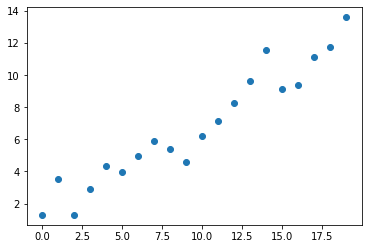

In [3]:
#generate dataset
num_samples,w,b=20,0.5,2
xs=np.asarray(range(num_samples))
ys=np.asarray([x*w+b+np.random.normal() for x in range(num_samples)])
plt.scatter(xs,ys)

In [4]:
#create a linear model
class Linear(object):
    def __init__(self):
        self.w=tf.get_variable('w',dtype=tf.float32,shape=[],initializer=tf.zeros_initializer())
        self.b=tf.get_variable('b',dtype=tf.float32,shape=[],initializer=tf.zeros_initializer())
    def __call__(self,x):
        return self.w*x+self.b
    

In [5]:
#define the solver for linear regression
xtf=tf.placeholder(tf.float32,[num_samples],'xs')
ytf=tf.placeholder(tf.float32,[num_samples],'ys')
model=Linear()
model_output=model(xtf)

cov=tf.reduce_sum((xtf-tf.reduce_mean(xtf))*(ytf-tf.reduce_mean(ytf)))
var=tf.reduce_sum(tf.square(xtf-tf.reduce_mean(xtf)))
w_hat=cov/var
b_hat=tf.reduce_mean(ytf)-w_hat*tf.reduce_mean(xtf)

solve_w=model.w.assign(w_hat)
solve_b=model.b.assign(b_hat)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


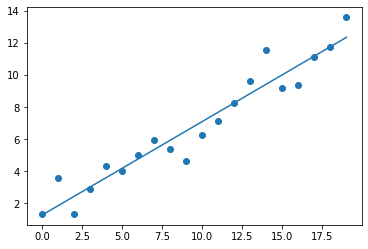

In [6]:
with tf.train.MonitoredSession() as sess:
    sess.run([solve_w,solve_b],feed_dict={xtf:xs,ytf:ys})
    preds=sess.run(model_output, feed_dict={xtf:xs,ytf:ys})

plt.scatter(xs,ys)
plt.plot(xs,preds)

In [7]:
# gradient descent solver
loss=tf.losses.mean_squared_error(ytf,model_output)
grads=tf.gradients(loss,[model.w,model.b])
update_w=tf.assign(model.w,model.w-grads[0]*0.001)
update_b=tf.assign(model.b,model.b-grads[1]*0.001)
update=tf.group(update_w,update_b)

# Build a basic network

1.Draw computation graph 画计算图

2.initialize input and weights matrix structure 初始化输入和权重矩阵结构 

3.define a forward propagation process 定义前向传播过程 

4.define loss function and backward propagation 定义损失函数及后向传播过程 

5.set start values for all variables 给所有变量赋初值 

6.build a session and run 生成会话，训练模型

## forward propagation

In [8]:
x=tf.constant([[0.7,0.5]])
w1=tf.Variable(tf.random_normal([2,3],stddev=1,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

a=tf.matmul(x,w1)
y=tf.matmul(a,w2)

with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    print(sess.run(y))

[[3.0904665]]


In [9]:
#sess.run() feed data, placeholder define the format
x=tf.placeholder(tf.float32,shape=(None,2))        # None means any rows
w1=tf.Variable(tf.random_normal([2,3],stddev=1,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

a=tf.matmul(x,w1)
y=tf.matmul(a,w2)

with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    print(sess.run(y,feed_dict={x:[[0.7,0.5],[0.2,0.3]]}))
    print(sess.run(w1))

[[3.0904665]
 [1.2236414]]
[[-0.8113182   1.4845988   0.06532937]
 [-2.4427042   0.0992484   0.5912243 ]]


## backward propagation

reduce loss as the target

$$loss=tf.reduce\_mean(tf.square(y\_-y))$$

$$train\_step=tf.train.AdamOptimizer(learning\_rate).minimize(loss)$$

In [10]:
seed=50
STEPS=3000
BATCH=100
rng=np.random.RandomState(seed)
X=rng.rand(32,2)
# target
Y=[[int(x0+x1<1)] for (x0,x1) in X]
print(Y)

[[1], [1], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [1], [1], [0], [1], [1], [1], [0]]


In [11]:
x=tf.placeholder(tf.float32,shape=(None,2))        
y_=tf.placeholder(tf.float32,shape=(None,1))

w1=tf.Variable(tf.random_normal([2,3],stddev=1,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

a=tf.matmul(x,w1)
y=tf.matmul(a,w2)

loss=tf.reduce_mean(tf.square(y-y_))

train_step=tf.train.GradientDescentOptimizer(0.001).minimize(loss)

with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    
    for i in range(STEPS):
        start=(i*BATCH)%32
        end=start+BATCH
        # batch means the size
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y[start:end]})
        # output loss to record the process
        if i% 500==0:
            total_loss=sess.run(loss,feed_dict={x:X,y_:Y})
            print("After %d training steps, loss is %g"% (i,total_loss))
            
    print('\n',sess.run(w1),'\n',sess.run(w2),'\n')

After 0 training steps, loss is 6.8253
After 500 training steps, loss is 0.366733
After 1000 training steps, loss is 0.339729
After 1500 training steps, loss is 0.331238
After 2000 training steps, loss is 0.326969
After 2500 training steps, loss is 0.323645

 [[-0.6859016   0.8034872   0.09599794]
 [-2.3436713  -0.12719154  0.58733255]] 
 [[-0.01478495]
 [ 0.8070384 ]
 [-0.0692187 ]] 



# parameter selection

parameter amount: if adjacent layers have m, n nodes, parameters should be m*n+n

## loss function

self-defined loss： 
$$ loss(y,y\_)=\sum_n f(y,y\_) $$


$$f(y,y\_)=
\begin{cases}
PROFIT*(y\_-y), & y<y\_,\\
COST*(y-y\_), & y>=y\_
\end{cases}$$

In [12]:
#eg: loss for merchants
COST=4
PROFIT=5
loss=tf.reduce_sum(tf.where(tf.greater(y,y_),(y-y_)*COST,(y_-y)*PROFIT))

cross entropy:

$$H(y\_,y)=-\sum y\_*\log y$$

In [13]:
#tf.clip_by_value, limit value interval
ce=-tf.reduce_mean(y_*tf.log(tf.clip_by_value(y,1e-12,1.0)))

softmax function:
$$softmax(y_i)=\frac{e^{y_i}}{\sum_{j=1}^n e^{y_j}}$$

In [14]:
# labels=tf.argmax(y_,1)  find the class with the largest probability
ce=tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y,labels=tf.argmax(y_,1))
loss=tf.reduce_mean(ce)

## learning rate

In [16]:
w=tf.Variable(tf.constant(5,dtype=tf.float32))
loss=tf.square(w+1)

learning_rate=0.1
train_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    
    for i in range(20):
        sess.run(train_step)
        print("After %d steps"%i, sess.run(w), "  ", sess.run(loss))

After 0 steps 3.8    23.04
After 1 steps 2.84    14.7456
After 2 steps 2.072    9.437184
After 3 steps 1.4576    6.0397983
After 4 steps 0.96607995    3.8654704
After 5 steps 0.57286394    2.473901
After 6 steps 0.25829116    1.5832965
After 7 steps 0.006632924    1.0133098
After 8 steps -0.19469367    0.64851826
After 9 steps -0.35575494    0.41505167
After 10 steps -0.48460394    0.2656331
After 11 steps -0.58768314    0.17000519
After 12 steps -0.6701465    0.10880332
After 13 steps -0.73611724    0.06963411
After 14 steps -0.7888938    0.04456582
After 15 steps -0.83111507    0.02852212
After 16 steps -0.86489207    0.018254153
After 17 steps -0.89191365    0.011682658
After 18 steps -0.91353095    0.0074768974
After 19 steps -0.93082476    0.004785214


exponential decay learning rate:

$$learningRate=learningRateBase*learningRateDecay^{\frac{globalStep}{learningRateStep}}$$

In [17]:
learning_rate_base=0.1
learning_rate_decay=0.99
learning_rate_step=1  # after this number of rounds of batch，update learning rate, generally =sample_size/batch_size
global_step=tf.Variable(0,trainable=False)
learning_rate=tf.train.exponential_decay(learning_rate_base,global_step,learning_rate_step,learning_rate_decay,staircase=True)

w=tf.Variable(tf.constant(5,dtype=tf.float32))
loss=tf.square(w+1)
train_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss,global_step=global_step)

with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    
    for i in range(20):
        sess.run(train_step)
        learn_val=sess.run(learning_rate)
        #globalstep_val=sess.run(global_step)
        print("After %d steps"%i, learn_val, "  ", sess.run(w), "  ", sess.run(loss))

After 0 steps 0.099    3.8    23.04
After 1 steps 0.09801    2.8495998    14.819419
After 2 steps 0.0970299    2.0950012    9.579033
After 3 steps 0.096059605    1.494386    6.2219615
After 4 steps 0.09509901    1.0151665    4.060896
After 5 steps 0.094148025    0.6318858    2.6630511
After 6 steps 0.09320655    0.32460818    1.7545869
After 7 steps 0.09227448    0.077683866    1.1614027
After 8 steps 0.09135174    -0.121201575    0.77228665
After 9 steps 0.09043822    -0.2817611    0.5158671
After 10 steps 0.089533836    -0.4116736    0.34612796
After 11 steps 0.0886385    -0.51702386    0.23326595
After 12 steps 0.08775212    -0.60264444    0.15789144
After 13 steps 0.0868746    -0.672382    0.107333556
After 14 steps 0.08600585    -0.7293054    0.07327557
After 15 steps 0.085145794    -0.77586806    0.050235126
After 16 steps 0.084294334    -0.81403583    0.03458267
After 17 steps 0.08345139    -0.8453873    0.023905093
After 18 steps 0.08261688    -0.8711926    0.016591353
After 19

## moving average

moving average（shadow）change all parameters

shadow= shadow\*decay_rate+（1-decay_rate）\*parameter

shadow initial value= parameter initial value

decay_rate= min{moving_average_decay,(1+ rounds)/(10+ rounds)}

In [18]:
w1=tf.Variable(0,dtype=tf.float32)
global_step=tf.Variable(0,trainable=False)
moving_average_decay=0.99
ema=tf.train.ExponentialMovingAverage(moving_average_decay,global_step)
ema_op=ema.apply(tf.trainable_variables())

with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    sess.run(tf.assign(w1,10))
    print(sess.run([w1,ema.average(w1)]))
    
    sess.run(tf.assign(global_step,100))   
    sess.run(ema_op)
    print(sess.run([w1,ema.average(w1)]))
    sess.run(ema_op)
    print(sess.run([w1,ema.average(w1)]))
    sess.run(ema_op)
    print(sess.run([w1,ema.average(w1)]))

[10.0, 0.0]
[10.0, 0.81818163]
[10.0, 1.569421]
[10.0, 2.2591956]


In [19]:
shadow=0
decay=min(0.99,101/110)
for i in range(5):
    shadow=shadow*decay+(1-decay)*10
    print(shadow)

0.8181818181818179
1.5694214876033052
2.259196093163035
2.8925345946315137
3.47405449143439


## Regularizer

loss_mse=tf.reduce\_mean(tf.square(y-y_))

loss_total=loss_mse+tf.add_n(tf.get_collection('losses'))